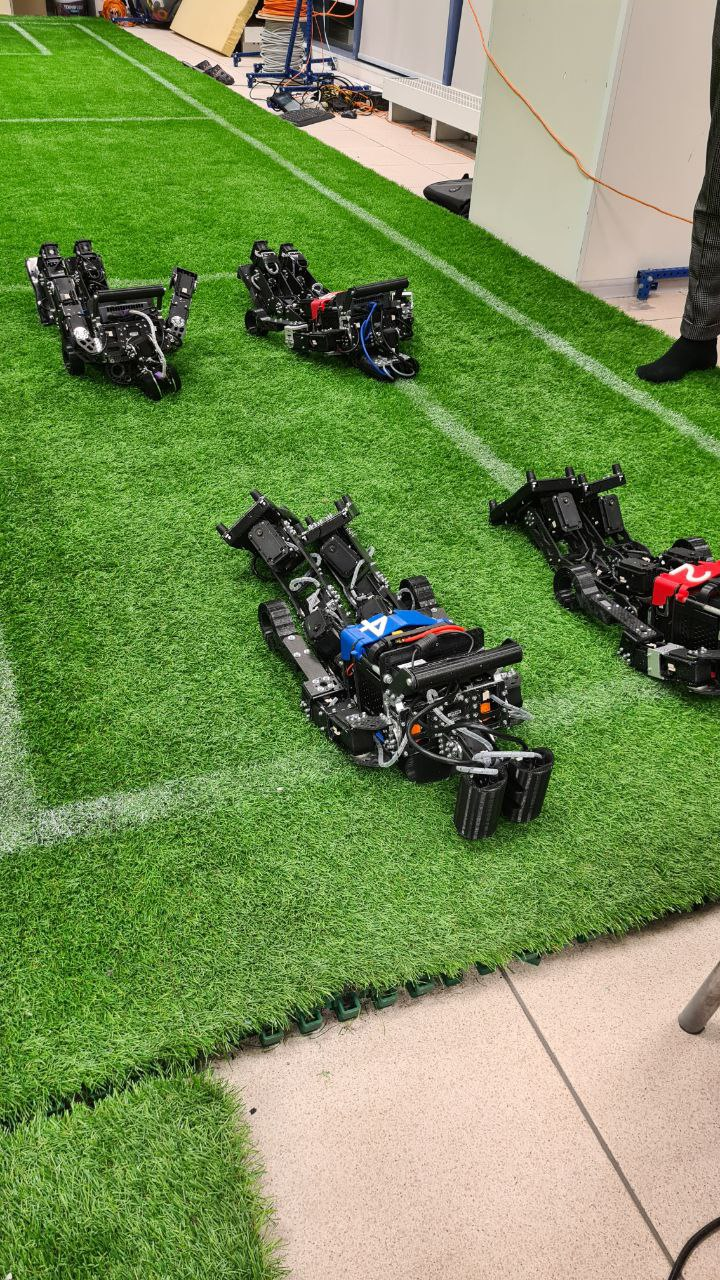

In [89]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('sahrs_on_the_field.jpg')

cv2_imshow(img)

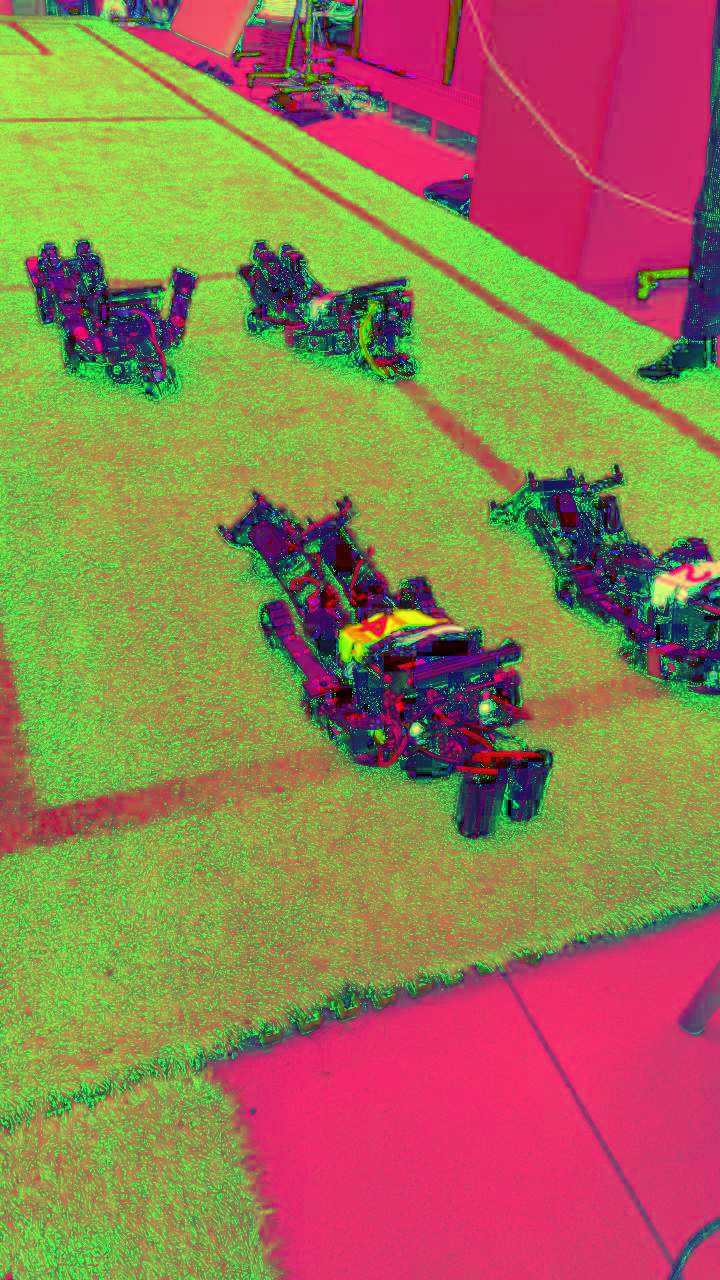

In [90]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
cv2_imshow(img)

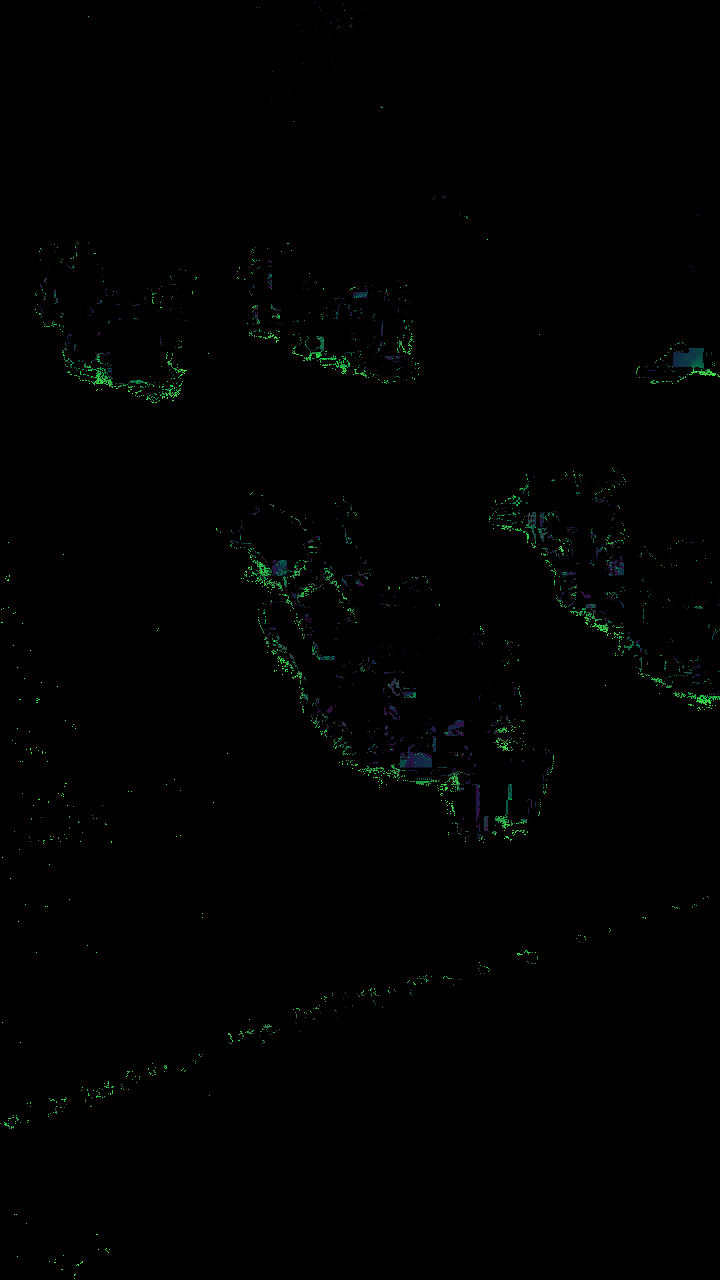

In [91]:
# Определяем интервалы по каналам
lower = np.array([68,0,0])
upper = np.array([70,250,70])

# Определяем маску
mask = cv2.inRange(img, lower, upper)

# Применяем маску
res = cv.bitwise_and(img, img, mask= mask)

# Смотрим на результаты
cv2_imshow(res)

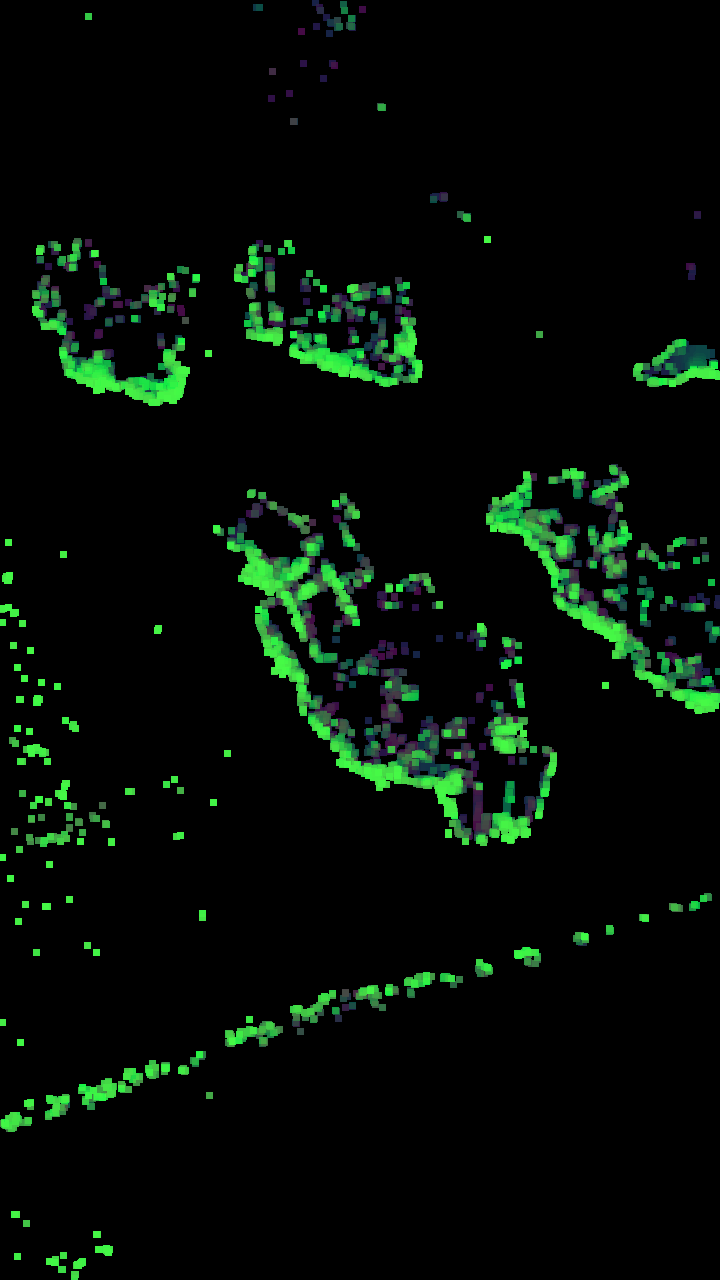

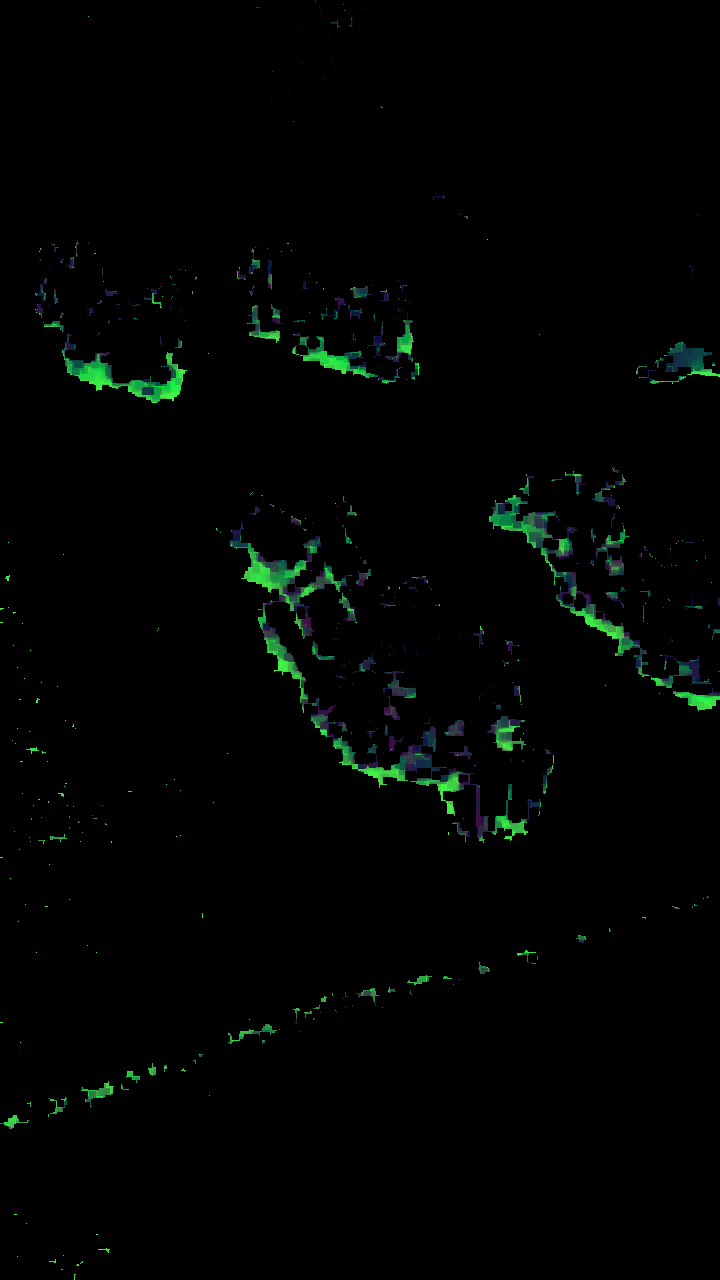

In [92]:
# Морфологические операции

kernel = np.ones((7,7),np.uint8)
dilation = cv.dilate(res,kernel,iterations = 1)
cv2_imshow(dilation)

erosion = cv2.erode(dilation, kernel, iterations = 1)
cv2_imshow(erosion)

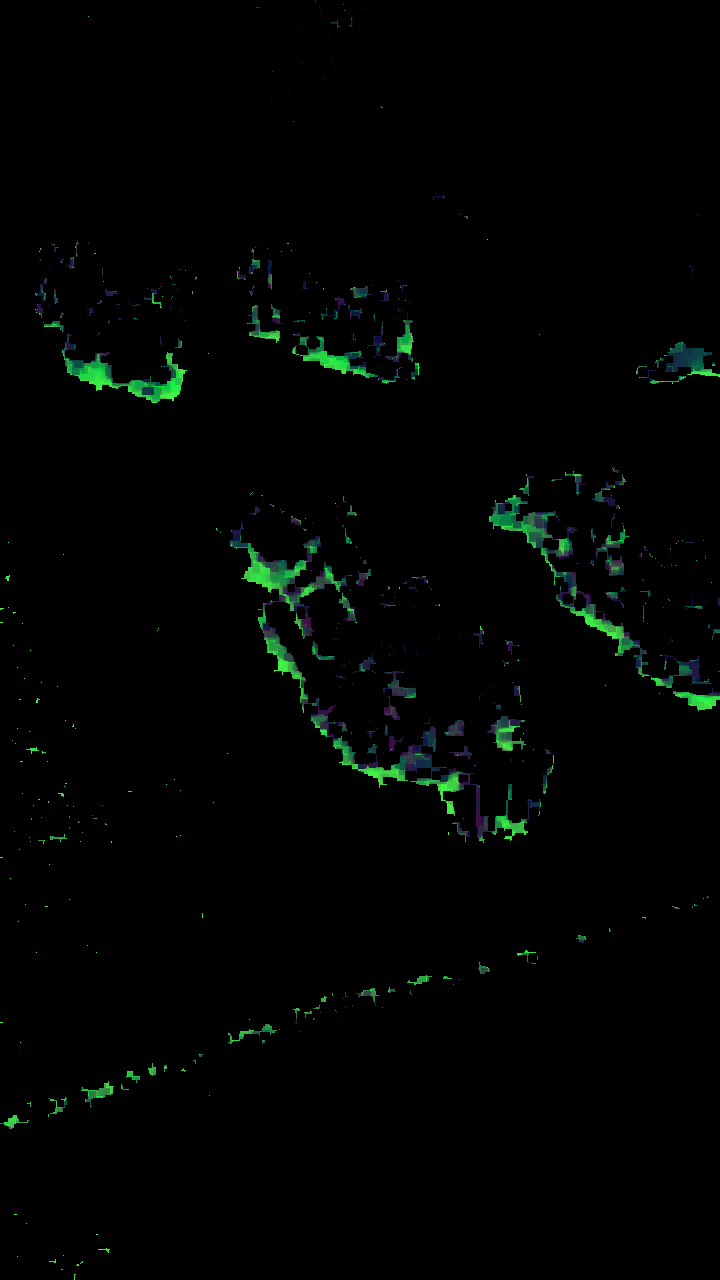

In [98]:
opening = cv.morphologyEx(erosion, cv.MORPH_CLOSE, kernel)
cv2_imshow(opening)

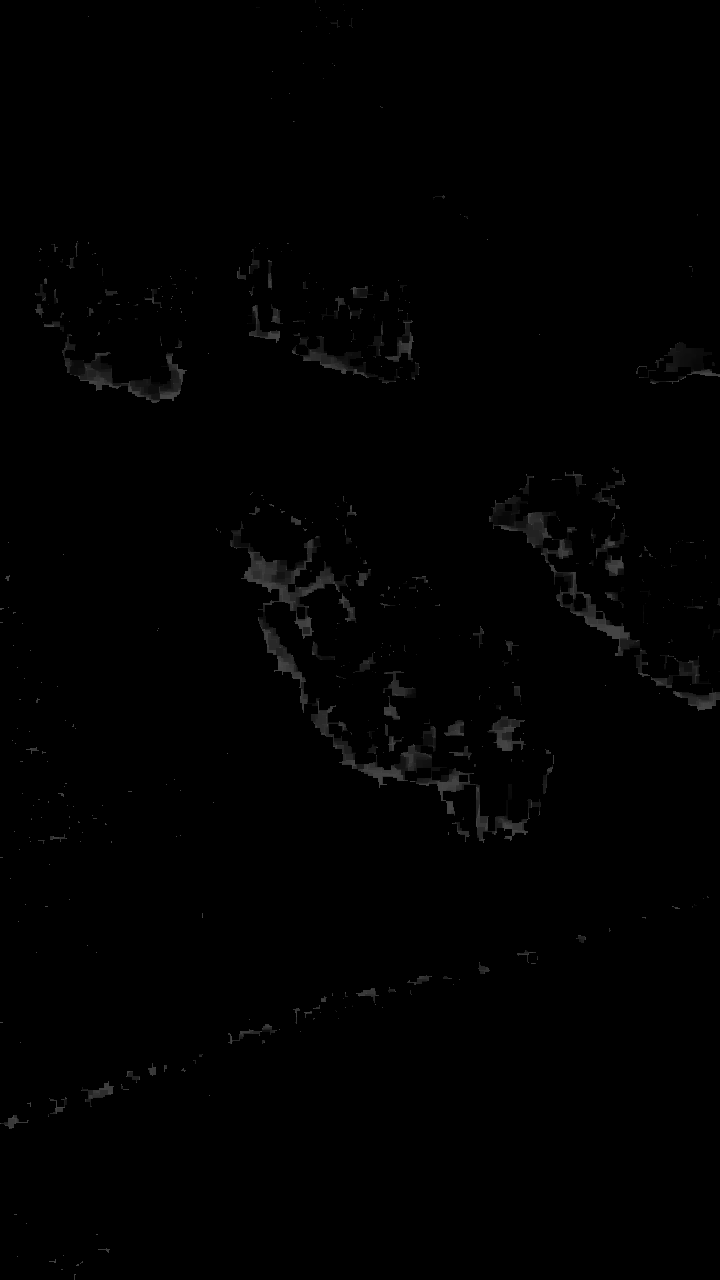

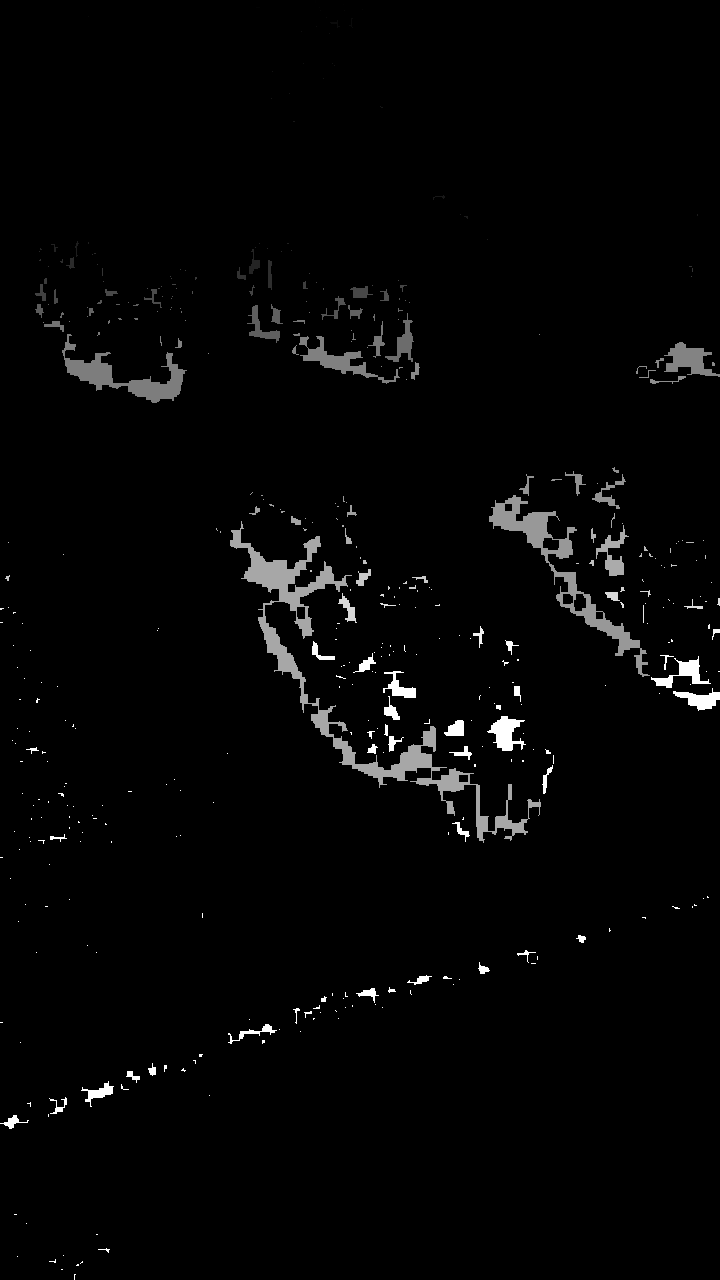

In [112]:
h, s, v1 = cv2.split(opening)

cv2_imshow(v1)

connectivity = 4 # or whatever you prefer

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(v1 , connectivity , cv2.CV_32S)

cv2_imshow(labels)